In [5]:
import pandas as pd
from math import pi
from matplotlib import pyplot as plt
import os
path = os.getcwd()

In [12]:
def createBG(categories):
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([65, 130, 195], color="grey", size=7)
    plt.ylim(0, 260)

    return (angles, ax)

In [184]:
def plot_single(*id, comp = False):
    pokedex = pd.read_csv(f"{path}\Dataframe\pokedex.csv").set_index("id")
    t = 1
    categories = ["HP", "Atk", "Def", "SpAtk", "SPDef", "Spd"]
    angles, ax = createBG(categories)
    
    values = pokedex.loc[id[0]][categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label = pokedex.loc[id[0]]["Name"])
    ax.fill(angles, values, 'b', alpha=0.1)

    if comp:
        indexes = list(pokedex)
        del indexes[0:9]
        if type(id[1]) == int:
            values = pokedex.loc[id[1]][categories].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label = pokedex.loc[id[1]]["Name"])
            ax.fill(angles, values, 'b', alpha=0.1)

        elif id[1] in indexes:
            searchid = pokedex.loc[id[0]][id[1]]
            comp_df = pokedex[pokedex[id[1]] == searchid]
            cat_comp_mean = dict(comp_df[categories].mean())
            mean_plot = pd.DataFrame(cat_comp_mean, index = [0])
            values = mean_plot[categories].values.flatten().tolist()
            values += values[:1]
            ax.plot(angles, values, linewidth=1, linestyle='solid', label=searchid)
            ax.fill(angles, values, 'r', alpha=0.1)
            

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()
    


          HP        Atk        Def      SpAtk      SPDef        Spd
0  67.778857  74.983819  69.858684  66.538296  67.299892  64.444444
Common


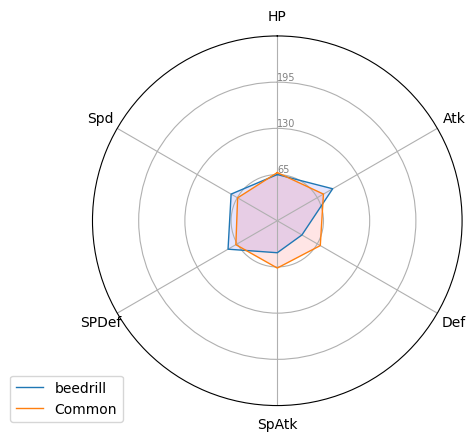

In [191]:
plot_single(15, "Rarity", comp = True)

In [39]:
pokedex = pd.read_csv(f"{path}\Dataframe\pokedex.csv").set_index("id")
indexes = list(pokedex)
del indexes[0:9]
print(indexes)


['Rarity', 'Type1', 'Type2']


In [157]:
comp_df = pokedex[pokedex["Type1"] == pokedex.loc[4]["Type1"]]
comp_df

,Name,HP,Atk,Def,SpAtk,SPDef,Spd,Weight,Height,Rarity,Type1,Type2
id,,,,,,,,,,,,
4,charmander,39,52,43,60,50,65,85,6,Common,fire,fire
5,charmeleon,58,64,58,80,65,80,190,11,Common,fire,fire
6,charizard,78,84,78,109,85,100,905,17,Common,fire,flying
37,vulpix,38,41,40,50,65,65,99,6,Common,fire,fire
38,ninetales,73,76,75,81,100,100,199,11,Common,fire,fire
...,...,...,...,...,...,...,...,...,...,...,...,...
911,skeledirge,104,75,100,110,75,66,3265,16,Common,fire,ghost
935,charcadet,40,50,40,50,40,35,105,6,Common,fire,fire
936,armarouge,85,60,100,125,80,75,850,15,Common,fire,psychic


In [139]:
pokedex.loc[pokedex["Type1"] == "fire"]

,Name,HP,Atk,Def,SpAtk,SPDef,Spd,Weight,Height,Rarity,Type1,Type2
id,,,,,,,,,,,,
4,charmander,39,52,43,60,50,65,85,6,Common,fire,fire
5,charmeleon,58,64,58,80,65,80,190,11,Common,fire,fire
6,charizard,78,84,78,109,85,100,905,17,Common,fire,flying
37,vulpix,38,41,40,50,65,65,99,6,Common,fire,fire
38,ninetales,73,76,75,81,100,100,199,11,Common,fire,fire
...,...,...,...,...,...,...,...,...,...,...,...,...
911,skeledirge,104,75,100,110,75,66,3265,16,Common,fire,ghost
935,charcadet,40,50,40,50,40,35,105,6,Common,fire,fire
936,armarouge,85,60,100,125,80,75,850,15,Common,fire,psychic


In [58]:
categories = ["HP", "Atk", "Def", "SpAtk", "SPDef", "Spd"]

comp_df = pokedex[pokedex["Type1"] == pokedex.loc[1]["Type1"]]
cat_comp_mean = dict(comp_df[categories].mean())
teste = pd.DataFrame(cat_comp_mean, index = [0])

In [60]:
print(teste)

          HP        Atk        Def      SpAtk      SPDef        Spd
0  65.020619  73.639175  69.680412  72.226804  68.453608  58.917526


In [102]:
id = [1, "Type1"]
comp_df = pokedex[pokedex[id[1]] == pokedex.loc[1][id[1]]].mean(numeric_only = True)
comp_df

HP         65.020619
Atk        73.639175
Def        69.680412
SpAtk      72.226804
SPDef      68.453608
Spd        58.917526
Weight    306.041237
Height      9.123711
dtype: float64

In [106]:
comp_df = pokedex[pokedex[id[1]] == pokedex.loc[1][id[1]]]
cat_comp_mean = dict(comp_df[categories].mean())
mean_plot = pd.DataFrame(cat_comp_mean, index = [0])

values = mean_plot[categories].values.flatten().tolist()
values += values[:1]

In [107]:
print(values)

[65.02061855670104, 73.63917525773196, 69.68041237113403, 72.22680412371135, 68.45360824742268, 58.91752577319588, 65.02061855670104]


In [105]:
values = pokedex.loc[id[0]][categories].values.flatten().tolist()
values += values[:1]

print(values)

[45, 49, 49, 65, 65, 45, 45]


In [147]:
id = [4, "Type1"]
searchid = pokedex.loc[id[0]][id[1]]
comp_df = pokedex.loc[pokedex[id[1]] == searchid]
comp_df

,Name,HP,Atk,Def,SpAtk,SPDef,Spd,Weight,Height,Rarity,Type1,Type2
id,,,,,,,,,,,,
4,charmander,39,52,43,60,50,65,85,6,Common,fire,fire
5,charmeleon,58,64,58,80,65,80,190,11,Common,fire,fire
6,charizard,78,84,78,109,85,100,905,17,Common,fire,flying
37,vulpix,38,41,40,50,65,65,99,6,Common,fire,fire
38,ninetales,73,76,75,81,100,100,199,11,Common,fire,fire
...,...,...,...,...,...,...,...,...,...,...,...,...
911,skeledirge,104,75,100,110,75,66,3265,16,Common,fire,ghost
935,charcadet,40,50,40,50,40,35,105,6,Common,fire,fire
936,armarouge,85,60,100,125,80,75,850,15,Common,fire,psychic
